In [2274]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [2275]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [2277]:
def group_split(data: pd.DataFrame):
    splitted = []
    for pid in data['PassengerId']:
        if not pd.isna(pid):
            splitted.append(list(map(int, pid.split('_'))))
        else:
            splitted.append((np.nan, np.nan,))
    return splitted

In [2278]:
def cabin_split(data: pd.DataFrame):
    splitted = []
    for cabin in data['Cabin']:
        if not pd.isna(cabin):
            splitted.append(cabin.split('/'))
        else:
            splitted.append((np.nan, np.nan, np.nan,))
    return splitted

<AxesSubplot: xlabel='Age'>

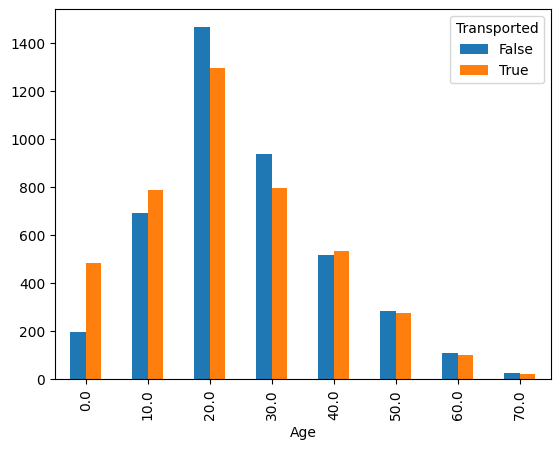

In [2279]:
dc = data.copy()
dc.Age = (dc.Age // 10) * 10
(dc.groupby("Age").Transported).value_counts().unstack().plot.bar()

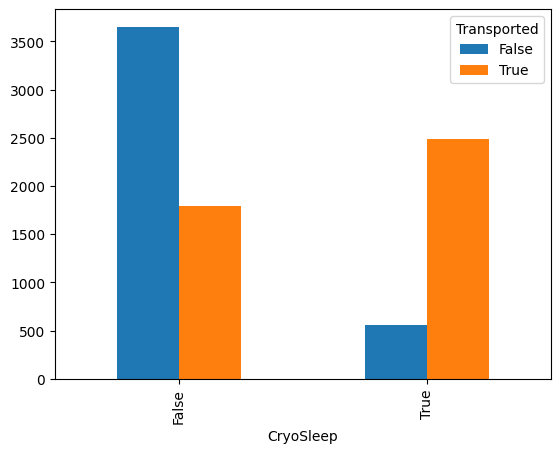

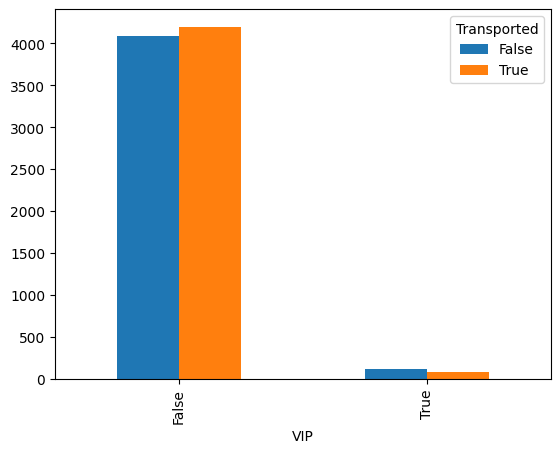

In [2280]:
for column in ["CryoSleep", "VIP"]:
    (data.groupby(column).Transported).value_counts().unstack().plot.bar()

In [2281]:
cabins = cabin_split(data)
p_data = data.drop(columns=["Cabin"])
p_data.insert(len(p_data.columns), column="Deck", value=list(map(lambda x: x[0], cabins)))
p_data.insert(len(p_data.columns), column="Num", value=list(map(lambda x: x[1], cabins)))
p_data.insert(len(p_data.columns), column="Side", value=list(map(lambda x: x[2], cabins)))
p_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [2282]:
groups = group_split(p_data)
p_data.drop(columns=["PassengerId"], inplace=True)
p_data.insert(len(p_data.columns), column="PassengerGroup", value=list(map(lambda x: x[0], groups)))
p_data.insert(len(p_data.columns), column="In-GroupId", value=list(map(lambda x: x[1], groups)))
p_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,PassengerGroup,In-GroupId
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,4,1


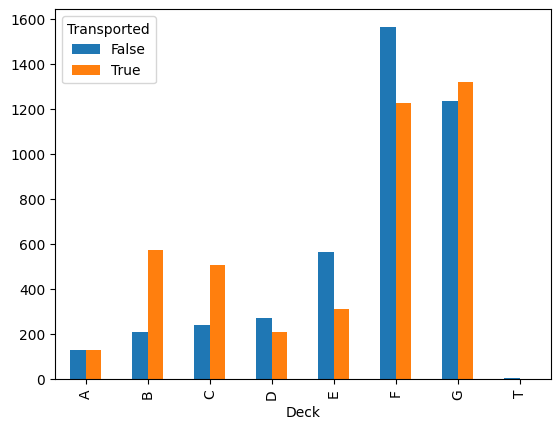

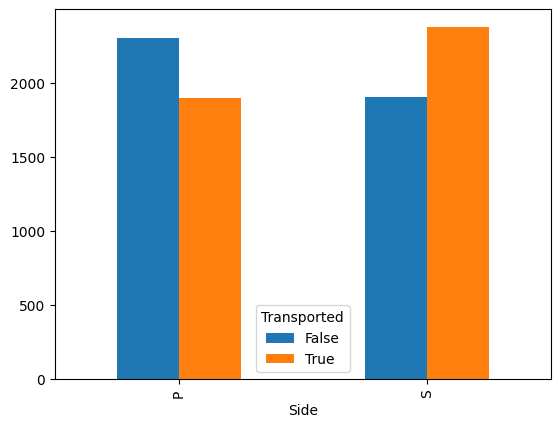

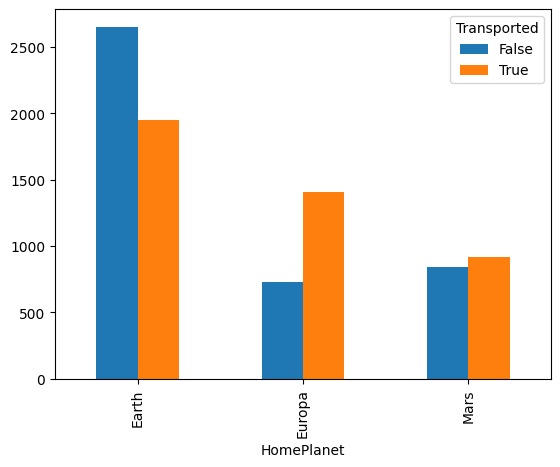

In [2283]:
for column in ["Deck", "Side", "HomePlanet"]:
    (p_data.groupby(column).Transported).value_counts().unstack().plot.bar()

In [2284]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_numeric_features(data, exclude=None):
    if exclude is None:
        exclude = ""
    return data.select_dtypes(include=numerics).drop(columns=exclude, errors="ignore")

In [2285]:
def correlation_heatmap(data):
    correlations = data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    

C:\Users\Aleksandr\AppData\Local\Temp\ipykernel_24076\2317757449.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


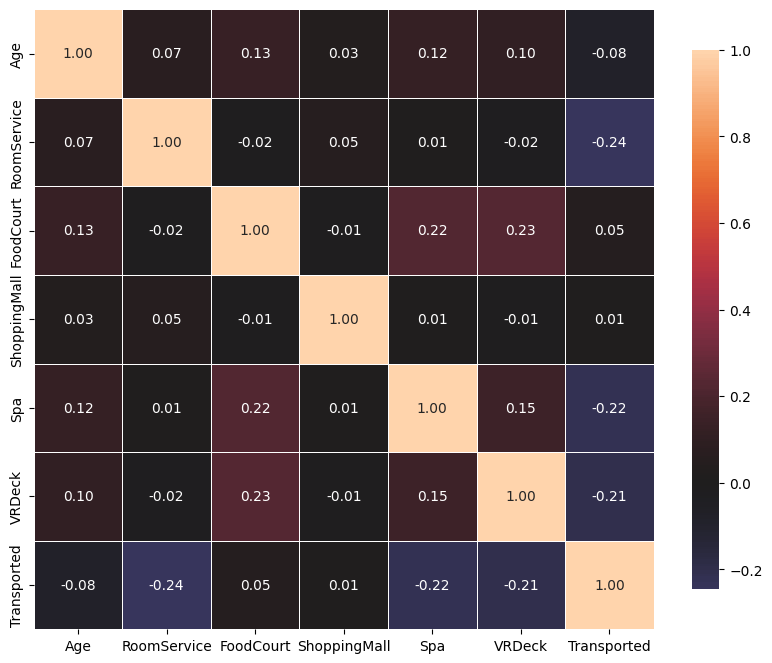

In [2286]:
# nf = get_numeric_features(data, ["Transported"])
correlation_heatmap(data)

In [2287]:
median_imputer = SimpleImputer(strategy="median")
mf_imputer = SimpleImputer(strategy="most_frequent")
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()


def preprocess(data: pd.DataFrame, target="Transported", fit=True):
    data = data.copy()

    drop_columns = ["Name"]
    
    data.drop(columns=drop_columns, inplace=True)

    # Spliting cabins
    cabins = cabin_split(data)
    data.drop(columns=["Cabin"], inplace=True)
    data.insert(len(data.columns), column="Deck", value=list(map(lambda x: x[0], cabins)))
    data.insert(len(data.columns), column="Num", value=list(map(lambda x: x[1], cabins)))
    data.insert(len(data.columns), column="Side", value=list(map(lambda x: x[2], cabins)))

    # Spliting passenger ids into groups
    groups = group_split(data)
    data.drop(columns=["PassengerId"], inplace=True)
    data.insert(len(data.columns), column="PassengerGroup", value=list(map(lambda x: x[0], groups)))
    data.insert(len(data.columns), column="In-GroupId", value=list(map(lambda x: x[1], groups)))
    data.head()

    numeric_features = get_numeric_features(data, target)
    numeric_columns = numeric_features.columns
    not_numeric_features = data.select_dtypes(exclude=numerics).drop(columns=target, errors="ignore")
    not_numeric_columns = not_numeric_features.columns

    one_hot_columns = ["CryoSleep", "HomePlanet", "VIP", "Side", "Destination", "Deck"]

    if fit:
        mf_imputer.fit(not_numeric_features)
        median_imputer.fit(numeric_features)

    numeric_features = median_imputer.transform(numeric_features)
    not_numeric_features = mf_imputer.transform(not_numeric_features)

    if fit:
        scaler.fit(numeric_features)

    numeric_features = scaler.transform(numeric_features)

    numeric_features = pd.DataFrame(numeric_features, columns=numeric_columns)
    not_numeric_features = pd.DataFrame(not_numeric_features, columns=not_numeric_columns)
    
    if fit:
        data = pd.concat([numeric_features, not_numeric_features, data.Transported], axis=1)
    else:
        data = pd.concat([numeric_features, not_numeric_features], axis=1)

    if fit:
        one_hot_encoder.fit(data[one_hot_columns])

    encoded = one_hot_encoder.transform(data[one_hot_columns])


    data = pd.merge(data, pd.DataFrame(encoded.toarray(), columns=one_hot_encoder.get_feature_names_out()), 
                                       left_index=True, right_index=True)
    data.drop(columns=one_hot_columns, inplace=True)
    
    return data

In [2288]:
data = preprocess(data)
data.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,In-GroupId,Num,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.734409,-0.491161,0,False,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,-1.734034,-0.491161,0,True,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.733660,-0.491161,0,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,-1.733660,0.457443,0,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,-1.733286,-0.491161,1,True,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [2289]:
from skorch import NeuralNetClassifier
import torch.nn as nn
import torch.optim

class DeepClassifier(nn.Module):
    def __init__(self, input_layer_size):
        super().__init__()
        self.dense0 = nn.Linear(input_layer_size, input_layer_size)
        self.relu0 = nn.PReLU()
        self.dropout = nn.Dropout(0.5)
        self.relu1 = nn.PReLU()
        self.relu2 = nn.PReLU()
        self.relu3 = nn.PReLU()
        self.dense1 = nn.Linear(input_layer_size, input_layer_size)
        self.dense2 = nn.Linear(input_layer_size, input_layer_size)
        self.dense3 = nn.Linear(input_layer_size, 5)
        self.output = nn.Linear(5, 2)

    def forward(self, X):
        X = self.relu0(self.dense0(X))
        # X = self.dropout(X)
        X = self.relu1(self.dense1(X))
        # X = self.dropout(X)
        X = self.relu2(self.dense2(X))
        # X = self.dropout(X)
        X = self.relu3(self.dense3(X))
        X = self.output(X)
        return X
    

In [2290]:
%colors nocolor

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

y = data.Transported.astype(np.int64).to_numpy()
X = data.drop(columns="Transported").astype(np.float32).to_numpy()

net = NeuralNetClassifier(DeepClassifier, 
                          module__input_layer_size=X.shape[1],
                          max_epochs=20, 
                          criterion=nn.CrossEntropyLoss(),
                          optimizer=torch.optim.Adam,
                          lr=1e-3)

pipeline = Pipeline([
    ("clf", net)
])

pipeline.fit(X, y)


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7221       0.5037        0.7024  0.1687
      2        0.6966       0.5037        0.6974  0.1830
      3        0.6909       0.5037        0.6918  0.1807
      4        0.6853       0.5049        0.6827  0.1837
      5        0.6733       0.5388        0.6658  0.1788
      6        0.6423       0.7223        0.6260  0.1620
      7        0.5945       0.7596        0.5842  0.1675
      8        0.5508       0.7665        0.5481  0.1630
      9        0.5162       0.7660        0.5295  0.1795
     10        0.4885       0.7665        0.5176  0.1734
     11        0.4727       0.7648        0.5102  0.1794
     12        0.4628       0.7648        0.5056  0.1645
     13        0.4594       0.7614        0.5029  0.1771
     14        0.4498       0.7619        0.4990  0.1871
     15        0.4473       0.7631        0.4967  0.1926
     16        0.4443       0.7

Pipeline(steps=[('clf',
                 <class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=DeepClassifier(
    (dense0): Linear(in_features=29, out_features=29, bias=True)
    (relu0): PReLU(num_parameters=1)
    (dropout): Dropout(p=0.5, inplace=False)
    (relu1): PReLU(num_parameters=1)
    (relu2): PReLU(num_parameters=1)
    (relu3): PReLU(num_parameters=1)
    (dense1): Linear(in_features=29, out_features=29, bias=True)
    (dense2): Linear(in_features=29, out_features=29, bias=True)
    (dense3): Linear(in_features=29, out_features=5, bias=True)
    (output): Linear(in_features=5, out_features=2, bias=True)
  ),
))])

In [2291]:
print(X.shape[1])

29


In [2292]:
test_data = pd.read_csv('test.csv')
test = preprocess(test_data, fit=False)
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,In-GroupId,Num,CryoSleep_False,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,-0.124841,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.729916,-0.491161,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.682698,-0.333105,-0.275387,-0.283579,2.237598,-0.263003,-1.728044,-0.491161,4,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.154088,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.727669,-0.491161,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.642213,-0.333105,3.887680,-0.283579,-0.109808,0.252842,-1.726921,-0.491161,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.612966,-0.317964,-0.281027,0.778343,-0.270626,-0.263003,-1.726172,-0.491161,5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [2293]:
y_pred = pipeline.predict(test.to_numpy().astype(np.float32))

In [2294]:
df = pd.DataFrame(
    {
        "Transported": y_pred.astype(bool)
    }, index=pd.Index(test_data.PassengerId, name="PassengerId")
)

In [2295]:
df.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False


In [2296]:
df.to_csv("predicted.csv")

In [2297]:
!kaggle competitions submit -c spaceship-titanic -f predicted.csv -m "DNN"

400 - Bad Request



  0%|          | 0.00/60.7k [00:00<?, ?B/s]
 13%|█▎        | 8.00k/60.7k [00:00<00:01, 46.1kB/s]
100%|██████████| 60.7k/60.7k [00:00<00:00, 68.7kB/s]
